# Differential Equations

This notebook will explain how to use linear algebra and discrete approximation to solve differential equations. This notebook follows some of the developments of these ideas in TAK. (See Example 8 from &sect; 4.3 for example.)

In [1]:
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpmath import mp, iv
from scipy import linalg

## Spring problem

We will study a classic example, which hopefully you have seen before in a differential equations class.

In the spring problem, we let a spring hang from the ceiling. Then we attach an object to the bottom of the spring. We pull down or lift the object and give it some initial velocity and let go. We want to know the position $u$ of the object at time $t$.

We use the variable $u$ to denote the vertical displacement of the object measured relative to position of the object at equilibrium. Thus $u(t)= 0$ for all $t$ is one solution. We also parameterize so that larger values if $u$ indicate that the object is lower (equivalently, the spring is longer), and smaller values indicate that the object is higher (and the spring is shorter).

The differential equation satisfied by the spring is of the form 
$$m u'' + \gamma u' + k u = F(t),$$
where $m$ is the mass of the object, $\gamma$ is the damping coefficient, $k$ is the spring constant, and $F(t)$ is the total of any external forces acting on the spring. In order to have a unique solution, we also specify:
* The initial displacement $u(0)=u_0$.
* The initial velocity of the mass $u'(0)=v_0$.

## Discretization

<p style="margin-top:2em; text-indent: 2em;">
Let's say that we want to approximate the solution on the interval $[0,T]$. By discretization, we mean we want to approximate the solution using finitely many points. We already know $u(0)$, and suppose we want to use $N$ more equally spaced points. So, we'd want to estimate the value of $u(t)$ for 
$$t \in \left\{\frac{T}{N}, \frac{2T}{N}, \ldots, \frac{(N-1)T}{N}, T\right\}.$$
Write $t_j = \frac{jT}{N}$ and $h=\frac{T}{N}$. Then 
$$t_{j-1}=t_j - h \quad \text{and} \quad t_{j+1}=t_j + h.$$
</p>

<p style="margin-top:2em; text-indent: 2em;">The idea is to replace $u''$ and $u'$ by discrete approximates.
</p>

<p style="margin-top:2em; text-indent: 2em;">
First, since we are only interested in times $t>0$, we use the following approximation of $u'(0)$:
$$u'(0) \approx \frac{u(h)-u(0)}{h}=\frac{u(t_1)-u(0)}{h}.$$
We consider $u(t_1)$ an unknown quantity, while $u(0)=u_0$ and $u'(0)=v_0$ are known. Keeping the unknown quantities on the left, we see 
$$\frac{1}{h} u(t_1) = \frac{1}{h} u_0 + u'(0)=\frac{u_0}{h}+v_0. \tag{1}$$
</p>

<p style="margin-top:2em; text-indent: 2em;">
At times $t_j$ with $j>0$, we can use the better approximation of the dertivative, 
$$u'(t_j)=\frac{1}{2h}\big(u(t_{j+1})-u(t_{j-1})\big)$$
and of the second derivative,
$$u''(t_j)=\frac{1}{h^2}\big(u(t_{j+1})-2u(t_j)+u(t_{j-1})\big)$$
Our differential equation $m u'' + \gamma u' + k u = F(t)$ then becomes
$$\frac{m}{h^2}\big(u(t_{j+1})-2u(t_j)+u(t_{j-1})\big) + \frac{\gamma}{2h}\big(u(t_{j+1})-u(t_{j-1})\big) + k u(t_j)=F(t_j).$$
Grouping like terms, we can write this as
$$\frac{2m+\gamma h}{2h^2} u(t_{j+1}) + \frac{kh^2-2m}{h^2} u(t_j) + \frac{2m-\gamma h}{2h^2} u(t_{j-1}) = F(t_j).\tag{2}$$
In the special case of $j=1$, we know $u(t_0)=u_0$, so we can rewrite this as:
$$\frac{2m+\gamma h}{2h^2} u(t_{2}) + \frac{kh^2-2m}{h^2} u(t_1) = F(t_1) - \frac{2m-\gamma h}{2h^2} u_0.\tag{3}$$

</p>

<p style="margin-top:2em; text-indent: 2em;">
We have $N$ unknowns, $u(t_1), \ldots, u(t_n)$ and $N$ equations, consisting of the equation $(1)$, equation $(3)$, and $(2)$ for $j \in \{2, \ldots, N-1\}$. Each equation is linear, so we can write it as a matrix equation. Namely,
$$\begin{bmatrix}
\frac{1}{h} & 0 & \ldots & & & \dots & 0 \\
\frac{kh^2-2m}{h^2} & \frac{2m+\gamma h}{2h^2} & 0 & \ldots & & \dots & 0 \\
\frac{2m-\gamma h}{2h^2} & \frac{kh^2-2m}{h^2} & \frac{2m+\gamma h}{2h^2} & 0 & \ldots & \dots & 0 \\
0 & \frac{2m-\gamma h}{2h^2} & \frac{kh^2-2m}{h^2} & \frac{2m+\gamma h}{2h^2} & 0 & \ldots & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\ 
\vdots &  & \ddots & \ddots & \ddots & \ddots & 0 \\ 
0 & \dots & \dots & 0 & \frac{2m-\gamma h}{2h^2} & \frac{kh^2-2m}{h^2} & \frac{2m+\gamma h}{2h^2}
\end{bmatrix}.
\begin{bmatrix}
u(t_1) \\
u(t_2) \\
u(t_3) \\
u(t_4) \\
\vdots \\
u(t_N) \\
\end{bmatrix}
=
\begin{bmatrix}
\frac{u_0}{h}+v_0 \\
F(t_1) - \frac{2m-\gamma h}{2h^2} u_0 \\
F(t_2) \\
F(t_3) \\
\vdots \\
F(t_{N-1})
\end{bmatrix}
$$
Since the matrix is lower triangular, we can solve for the $u$ vector using forward substitution.
</p>

## Implementation

We need to pass our function a number of parameters:
* The mass `m`, the damping constant `gamma`, and the spring constant `k`.
* The forcing function `F`, which will be a Python function ${\mathbb R} \to {\mathbb R}$.
* The initial position `u0` and velocity `v0`.
* The time $T$ determining the interval $[0,T]$.
* The number of points $N$ used in $[0,T]$.

Our function will return a numpy array `u` with entries `u[0]` up to `u[N]`. The value of `u[j]` will store the computed value of $u(t_j)$.

The following function implements this:

In [2]:
def spring_solve(m, gamma, k, F, u0, v0, T, N):
    h = T/N
    u = np.zeros(N+1)
    u[0] = u0
    u[1] = u0 + h*v0
    for j in range(2,N+1):
        u[j] = 2*h**2/(2*m+gamma*h) * \
                ( F((j-1)*h)-(2*m-gamma*h)/(2*h**2)*u[j-2] - (k*h**2-2*m)/h**2*u[j-1] )
    return u

## Examples

### Example 1
First we consider the differential equation
$$u'' + u = 0, \quad u(0)=0, \quad \text{and} \quad u'(0)=1.$$
Clearly the solution is $u(t)=\sin(t)$.

We will observe that our algorithm works surprisingly well over the interval $[0,10]$ with $N=20$.

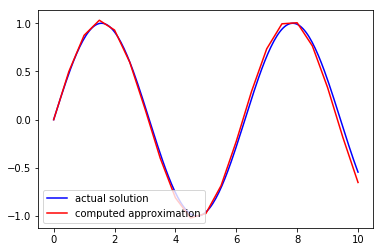

In [3]:
T = 10
N = 20
x = np.linspace(0,10,200)
sol, = plt.plot(x, np.sin(x), "b", label="actual solution")
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:0, 0, 1, T, N)
approx, = plt.plot(t, u, "r", label="computed approximation")
legend = plt.legend(handles=[sol,approx], loc='lower left')
plt.show()

For larger values of $N$, it works even better:

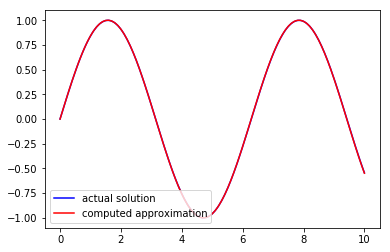

In [4]:
T = 10
N = 100
x = np.linspace(0,10,200)
sol, = plt.plot(x, np.sin(x), "b", label="actual solution")
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:0, 0, 1, T, N)
approx, = plt.plot(t, u, "r", label="computed approximation")
legend = plt.legend(handles=[sol,approx], loc='lower left')
plt.show()

### Example 2

Here is a plot with some damping:

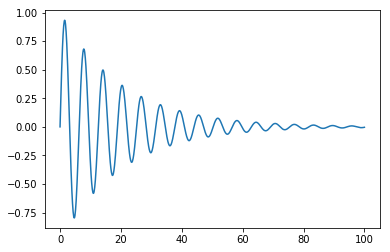

In [5]:
T = 100
N = 1000
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0.1, 1, lambda t:0, 0, 1, T, N)
plt.plot(t, u)
plt.show()

### Example 3

Here are some plots with some periodic forcing:

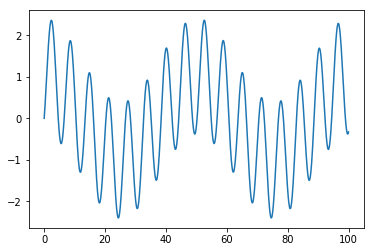

In [6]:
T = 100
N = 1000
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:np.cos(t/8), 0, 1, T, N)
plt.plot(t, u)
plt.show()

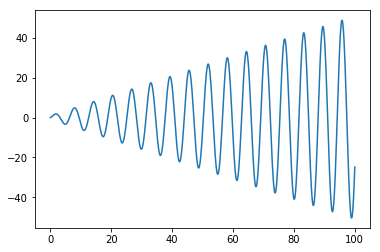

In [7]:
T = 100
N = 1000
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:np.cos(t), 0, 1, T, N)
plt.plot(t, u)
plt.show()

### Example 4

Some plots with both periodic forcing and some damping:

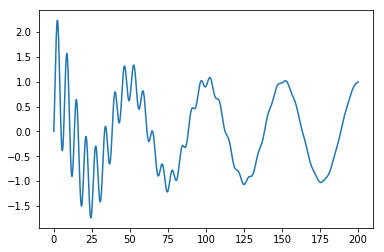

In [8]:
T = 200
N = 1000
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0.05, 1, lambda t:np.cos(t/8), 0, 1, T, N)
plt.plot(t, u)
plt.show()

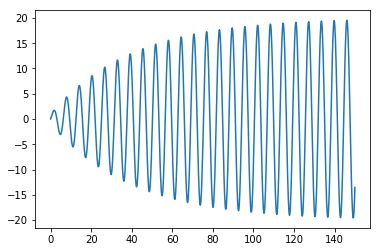

In [9]:
T = 150
N = 1000
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0.05, 1, lambda t:np.cos(t), 0, 1, T, N)
plt.plot(t, u)
plt.show()